# NB 4 | Statistical Analysis
---
## Project:
Amazon Reviews Analysis (DSC 400)

## Dataset:
Original: SAHITYA SAHU Amazon Large Dataset (~123GB) Sampled & Cleaned: Amazon_Master_Cleaned.csv (129794, 27)

## NB Objective:
Conduct Statistical tests

**Tasks:**
- Statistical tests
- Comparisons
- Build models (to find patterns)
- Answer research questions

## Setup & Load
---

In [35]:
#Core
import pandas as pd
import numpy as np

#Visuals
import seaborn as sns
import matplotlib.pyplot as plt

#Stats
import statsmodels.api as sm
from scipy.stats import pearsonr
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from scipy import stats
from scipy.stats import chi2_contingency

In [36]:
#Load
df_master = pd.read_csv("Amazon_FE_Dataset.csv") 
df_master.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,...,sentiment_polarity,sentiment_subjectivity,has_image,review_year,review_month,review_dayofweek,reviews_per_reviewer,reviews_per_product,avg_rating_product,avg_rating_reviewer
0,4,True,2017-05-09,A2VY416R3G7WD9,B0012XPRO8,Becky Ann Hathaway,i really liked this product. never really bou...,super soft,1494288000,0.0,...,0.250000,0.500000,0,2017,5,1,1,5,4.0,4.0
1,4,True,2016-06-25,A3CHVIU4GFE180,B00J9MJDFS,Anais,Have not used this item but a couple of times....,Nice product to have as it does several things...,1466812800,2.0,...,0.300000,0.500000,0,2016,6,5,1,1,4.0,4.0
2,4,True,2014-10-10,AT5L0D757JA4W,B0054EU4Z8,Luxdelux,Great cap but it doesn't really stay on my hea...,Four Stars,1412899200,0.0,...,0.400000,0.450000,0,2014,10,4,1,5,2.6,4.0
3,5,True,2013-03-03,A30X02Q6TP9G3N,B003CU26SY,sag412,I read this would help with my thinning edges....,Great!,1362268800,0.0,...,-0.150000,0.708333,0,2013,3,6,1,4,4.0,5.0
4,5,True,2017-03-01,A2V16V9O1JR53A,B01GOY8LBA,N P Hoca,My dad needed this bucket. He is 94 and in a...,"But he LOVED THIS, and told everyone how great...",1488326400,5.0,...,0.417593,0.620370,0,2017,3,2,1,1,5.0,5.0


## Descriptive Stats | Distributions
---
1. Missing Values
   - `reviewerName`: 23 missing
   - `reviewText`: 3 missing
   - `summary`: 35 missing
   - `image`: 127,382 missing
(`image` feature is possibly only useful for subset analysis)

In [37]:
#Overview
df.describe(include='all')

#Missing values
df.isnull().sum()

overall                        0
verified                       0
reviewTime                     0
reviewerID                     0
asin                           0
reviewerName                  23
reviewText                     3
summary                       35
unixReviewTime                 0
vote                           0
image                     127382
style                      81282
review_length                  0
word_count                     0
sentence_count                 0
avg_word_length                0
summary_length                 0
sentiment_polarity             0
sentiment_subjectivity         0
has_image                      0
review_year                    0
review_month                   0
review_dayofweek               0
reviews_per_reviewer           0
reviews_per_product            0
avg_rating_product             0
avg_rating_reviewer            0
dtype: int64

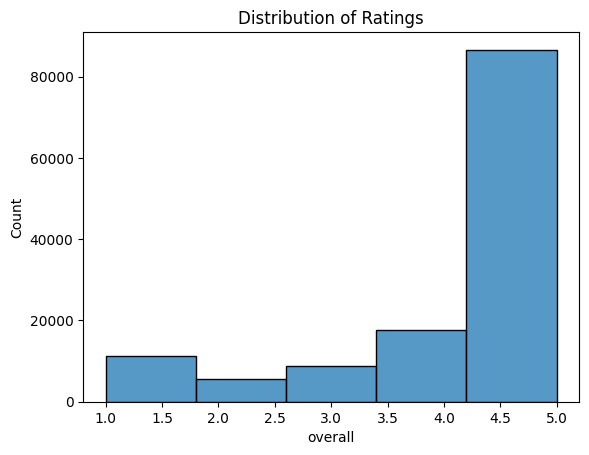

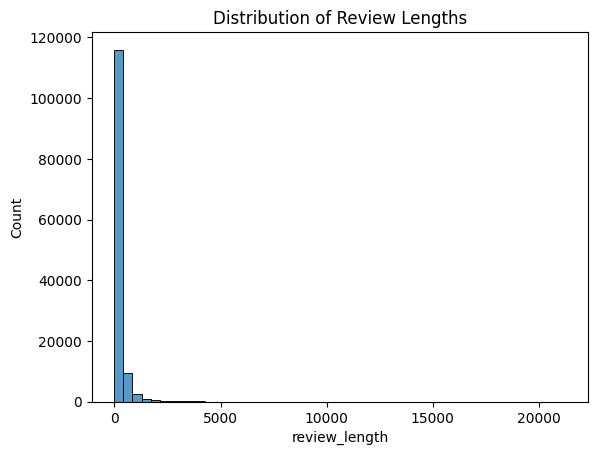

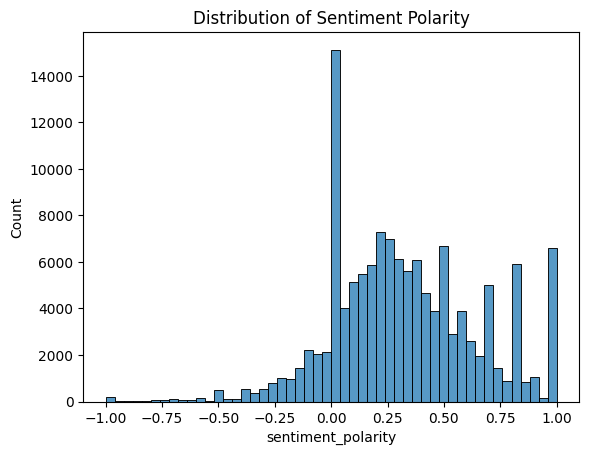

In [38]:
#Simple distribution plots (get brief idea)
sns.histplot(df['overall'], bins=5, kde=False)
plt.title("Distribution of Ratings")
plt.show()

sns.histplot(df['review_length'], bins=50)
plt.title("Distribution of Review Lengths")
plt.show()

sns.histplot(df['sentiment_polarity'], bins=50)
plt.title("Distribution of Sentiment Polarity")
plt.show()

## Correlation Analysis
---
1. Correlation (Between numeric)
2. Correlation: Sentiment Polarity v Rating
   - correlation is moderate to positive, reviews that have higher sentiment polarity are more likely to have higher ratings
   - p-value: statistically significant

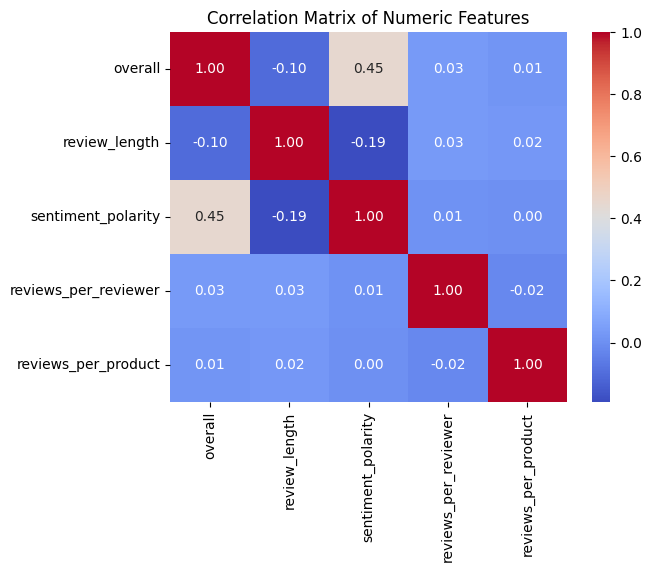

In [39]:
#Correlation (between numeric)
numeric_cols = ['overall', 'review_length', 'sentiment_polarity', 'reviews_per_reviewer', 'reviews_per_product']
corr = df[numeric_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [40]:
#Correlation Test | Sentiment v Rating
corr, pval = pearsonr(df_master["sentiment_polarity"], df_master["overall"])

print("Correlation Test | Sentiment v Rating")
print("Correlation:", round(corr, 3))
print("p-value:", pval)

Correlation Test | Sentiment v Rating
Correlation: 0.449
p-value: 0.0


## Comparisons
---
1. T-Test
   - 0 p-value, means there is a statistically significant difference
   - Verified reviews tend to have slightly higher ratings, suggesting that verified purchases are more reliable indicators of customer sentiment.
2. ANOVA
|sum_sq      | df         |F    |PR(>F) |
|------------|------------|-----|-------|
|C(asin)     | 9.831303   |  4.0  |1.565389  |0.181147|
|Residual  2047.416978 | 1304.0     |  NaN   |    NaN|

(No significant difference)

T-statistic: 19.12, p-value: 0.0000


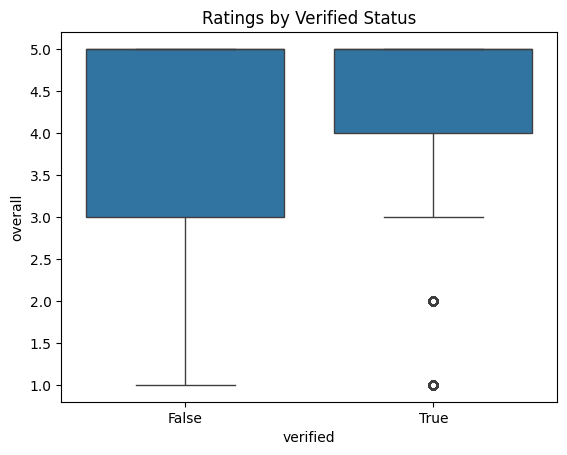

In [41]:
#T-test: 
#(Do verified and non-verified reviews differ in rating?)
verified_ratings = df[df['verified']==True]['overall']
non_verified_ratings = df[df['verified']==False]['overall']

t_stat, p_val = stats.ttest_ind(verified_ratings, non_verified_ratings, equal_var=False)
print(f"T-statistic: {t_stat:.2f}, p-value: {p_val:.4f}")

#Boxplot to visualize
sns.boxplot(x='verified', y='overall', data=df)
plt.title("Ratings by Verified Status")
plt.show()

In [42]:
#ANOVA (top 5 products)
top5_products = df['asin'].value_counts().head(5).index
anova_df = df[df['asin'].isin(top5_products)]

model = ols('overall ~ C(asin)', data=anova_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

               sum_sq      df         F    PR(>F)
C(asin)      9.831303     4.0  1.565389  0.181147
Residual  2047.416978  1304.0       NaN       NaN


In [43]:
#Neg v pos ratings (review length)
low_reviews = df_master[df_master["overall"] <= 2]["review_length"]
high_reviews = df_master[df_master["overall"] >= 4]["review_length"]

t_stat, p_val = stats.ttest_ind(low_reviews, high_reviews, equal_var=False)

print(f"T-statistic: {t_stat:.2f}")
print(f"p-value: {p_val:.4f}")


T-statistic: 27.68
p-value: 0.0000


In [44]:
#ANOVA: do ratings differ by product?
top_asins = df_master["asin"].value_counts().head(5).index
subset = df_master[df_master["asin"].isin(top_asins)]

anova_model = smf.ols("overall ~ C(asin)", data=subset).fit()
anova_table = sm.stats.anova_lm(anova_model)

print(anova_table)

              df       sum_sq   mean_sq         F    PR(>F)
C(asin)      4.0     9.831303  2.457826  1.565389  0.181147
Residual  1304.0  2047.416978  1.570105       NaN       NaN


In [45]:
#Extra FE: `rating_group`
df_master["rating_group"] = df_master["overall"].apply(
    lambda x: "Low (1–2)" if x <= 2 else "High (4–5)" if x >= 4 else "Neutral (3)"
)

In [46]:
#Chi-Sqr Test
table = pd.crosstab(df_master["verified"], df_master["rating_group"])
chi2, p, dof, expected = chi2_contingency(table)

print("Chi-square:", chi2)
print("p-value:", p)

Chi-square: 410.84659828647966
p-value: 6.106533271937604e-90


## Regression/ Predictive Stats | Look into Modeling
---
1. Regression
   - R-squared: 0.202 (~20% of variance)
   - `review_length`: Negative (small effect)
   - `sentiment_polarity`: Positive (strong effect)
From Diagnostics:
- Omnibus: non-normality
- Durbin-Watson: 1.986 (largely independent)

In [47]:
#Example to use: Predicting rating from sentiment polarity and review length
X = df[['review_length', 'sentiment_polarity']]
y = df['overall']

#Constant for intercept
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                overall   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                 1.643e+04
Date:                Wed, 18 Feb 2026   Prob (F-statistic):               0.00
Time:                        18:39:56   Log-Likelihood:            -2.0096e+05
No. Observations:              129794   AIC:                         4.019e+05
Df Residuals:                  129791   BIC:                         4.020e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.7103      0

In [48]:
#Regression: Votes v Rating
X = df_master[["vote", "sentiment_polarity"]]
y = df_master["overall"]

X = sm.add_constant(X)
model_votes = sm.OLS(y, X).fit()

print(model_votes.summary())

                            OLS Regression Results                            
Dep. Variable:                overall   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                 1.640e+04
Date:                Wed, 18 Feb 2026   Prob (F-statistic):               0.00
Time:                        18:39:56   Log-Likelihood:            -2.0099e+05
No. Observations:              129794   AIC:                         4.020e+05
Df Residuals:                  129791   BIC:                         4.020e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.6923      0

## Key Takeaways
---
Correlation Test: Sentiment Polarity v Rating
- Customer ratings strongly align with the emotional tone of the review text, making this a valuable predictive feature for modeling.

T-Test: Verified v Non-Verified Reviews
- Verification status is an important feature and could improve model reliability by recognizing true/authentic customer experiences

Regression Model: Rating from Sentiment & Votes
- `sentiment_polarity`: strongest predictor (more positive language corresponds to higher ratings)

Chi-Square Test: Categorical (verified, rating group)
- Strong association between categorical features
- They are not independent